# Classification
##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
Calendar = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/calendar.csv")
listings_df = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/listings.csv")
reviews_df = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/reviews.csv")


## Data Cleaning

In [3]:
Calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
#describe the count of the data 
Calendar.describe(include='object')

,date,available,price
count,1308890,1308890,643037
unique,365,2,1246
top,2017-09-05,f,$150.00
freq,3586,665853,20752


In [6]:
#Drop the duplicate values
Calendar.drop_duplicates()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


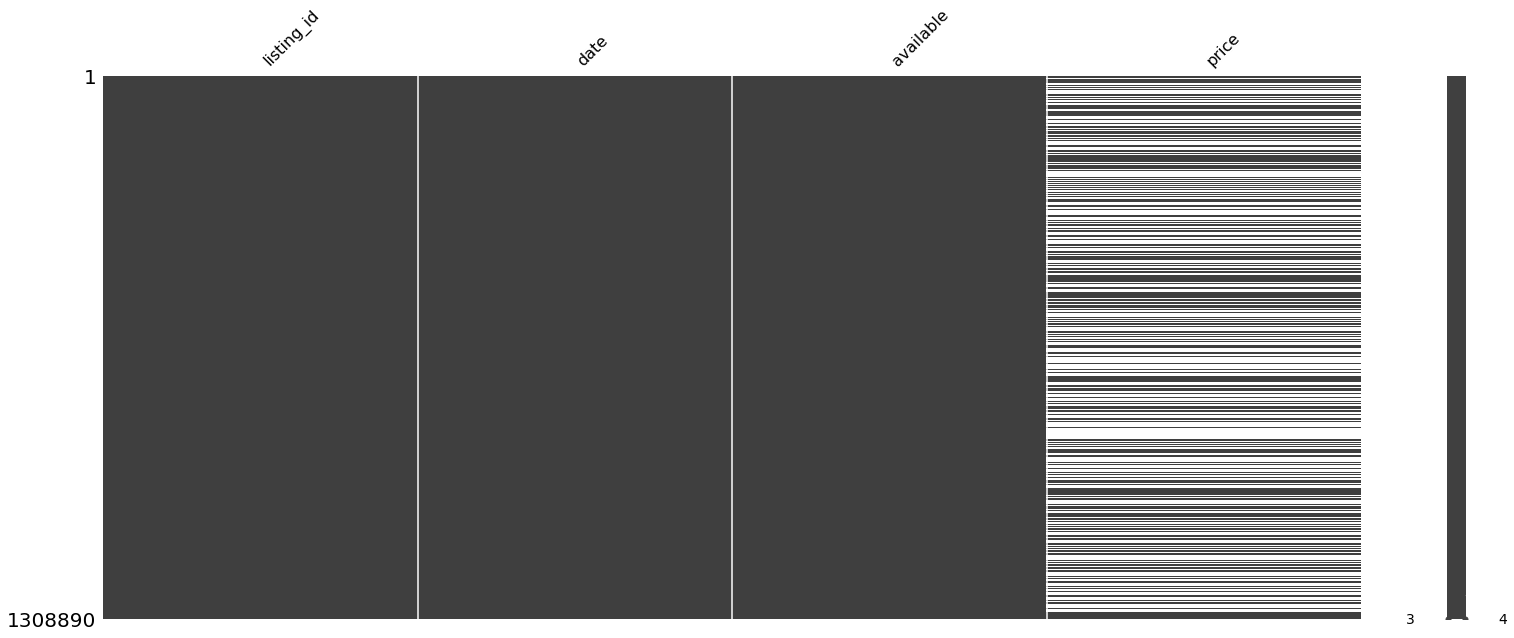

In [7]:
#Visualization of the null value in calendar.csv
import missingno as msno

msno.matrix(Calendar);

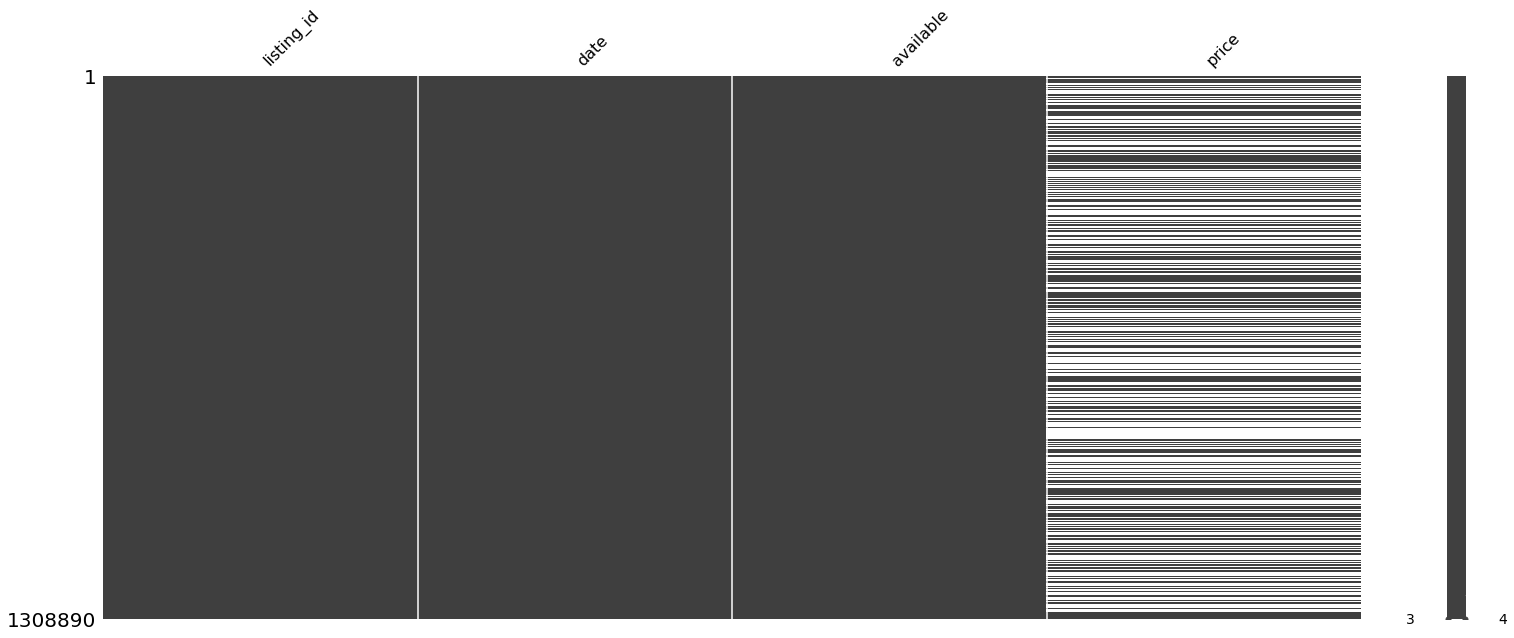

In [8]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

In [9]:
# Extract month and year from date string and rewrite values

Calendar['date'] = pd.to_datetime(Calendar.date)
    
month = Calendar['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})
 
year =Calendar['date'].dt.year
    
Calendar['Month'] = month
Calendar['Year'] = year

In [10]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
228673,13624476,2016-12-30,t,$275.00,December,2016
1102763,771309,2017-04-03,t,$58.00,April,2017
1245175,9496337,2017-02-15,f,NaN,February,2017
327830,8815738,2017-05-30,f,NaN,May,2017
290224,12351909,2017-05-27,f,NaN,May,2017
938235,2227959,2017-03-04,f,NaN,March,2017
537628,9180947,2016-09-20,f,NaN,Septempber,2016
605450,20000,2017-07-23,t,$75.00,July,2017
1070303,10068240,2017-04-09,t,$65.00,April,2017
419920,14094279,2017-01-23,f,NaN,January,2017


In [11]:
# convert string date to datetime object
Calendar.date = pd.to_datetime(Calendar.date)

In [12]:
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['available']
for column in boolean_columns:
    Calendar[column] =  Calendar[column].apply(lambda val: True if val=='t' else False)

In [13]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
518338,4777111,2017-07-29,True,$205.00,July,2017
214800,13813380,2017-01-28,False,NaN,January,2017
699807,9857049,2017-04-10,True,$259.00,April,2017
1209693,7283351,2017-05-29,False,NaN,May,2017
133561,4838985,2016-10-04,False,NaN,October,2016
960056,14770708,2017-01-21,True,$99.00,January,2017
894059,12962229,2017-03-15,False,NaN,March,2017
425710,6426364,2017-02-04,True,$200.00,February,2017
548458,2247190,2016-12-21,True,$299.00,December,2016
1124493,2384107,2017-07-26,False,NaN,July,2017


In [14]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  bool          
 3   price       643037 non-null   object        
 4   Month       1308890 non-null  object        
 5   Year        1308890 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 51.2+ MB


In [15]:
listings_df.shape

(3585, 95)

In [16]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [17]:
reviews_df.shape

(68275, 6)

In [18]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [19]:
# listings_csv.dtypes
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [20]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [21]:
reviews_df.set_index('id', inplace=True)

In [22]:
# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)

In [23]:
# test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   date           68275 non-null  datetime64[ns]
 2   reviewer_id    68275 non-null  int64         
 3   reviewer_name  68275 non-null  object        
 4   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.1+ MB


In [24]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [25]:
listings_df.set_index('id', inplace=True)

In [26]:
listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [27]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [28]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [29]:
# drop columns with no recordings

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [30]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]

In [31]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [32]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [33]:
# clean city column

listings_df.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan',
       'Milton', 'Dorchester', 'dorchester, boston ', 'South Boston',
       'Allston', 'ALLSTON'], dtype=object)

In [34]:
listings_df[listings_df.city=='波士顿']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,"If you are a student, I may give you 5% off.If...",...,NaN,NaN,NaN,f,f,strict,f,f,1,NaN


In [35]:
# drop row with unusual city name since there is only with observation associated with it

listings_df.drop(index=4625517, inplace=True)
listings_df.shape

(3254, 90)

In [36]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [37]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [38]:
listings_df.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [39]:
listings_df.fillna(0, inplace=True)

In [40]:
# test
listings_df.shape

(3254, 91)

In [41]:
#Show the availability of each month in Boston
new = Calendar.groupby(['Month']).count()[['listing_id']].sort_values(by = 'listing_id', ascending = False)
new

,listing_id
Month,
August,111166
December,111166
January,111166
July,111166
March,111166
May,111166
October,111166
April,107580
June,107580


Text(0, 0.5, 'availability')

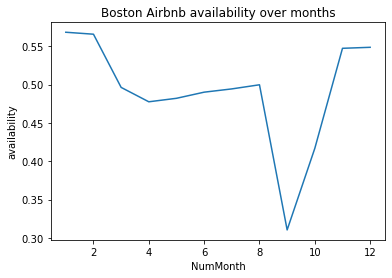

In [42]:
#Visualization the availability of each month in Boston
#Sep and Otc have the lowest availability rate which suggests these are the busiest time of the year to visit Boston
Nummonth = Calendar['date'].dt.month
Calendar['NumMonth'] = Nummonth
calendardf_copy=Calendar.copy()
Calmonth = Calendar['date'].dt.month
ax1 = calendardf_copy.groupby(['NumMonth'])['available'].mean().plot(title='Boston Airbnb availability over months')
ax1.set_ylabel("availability")

In [43]:
#Drop the null value rows
Calendar.dropna(subset=['price'], inplace=True)

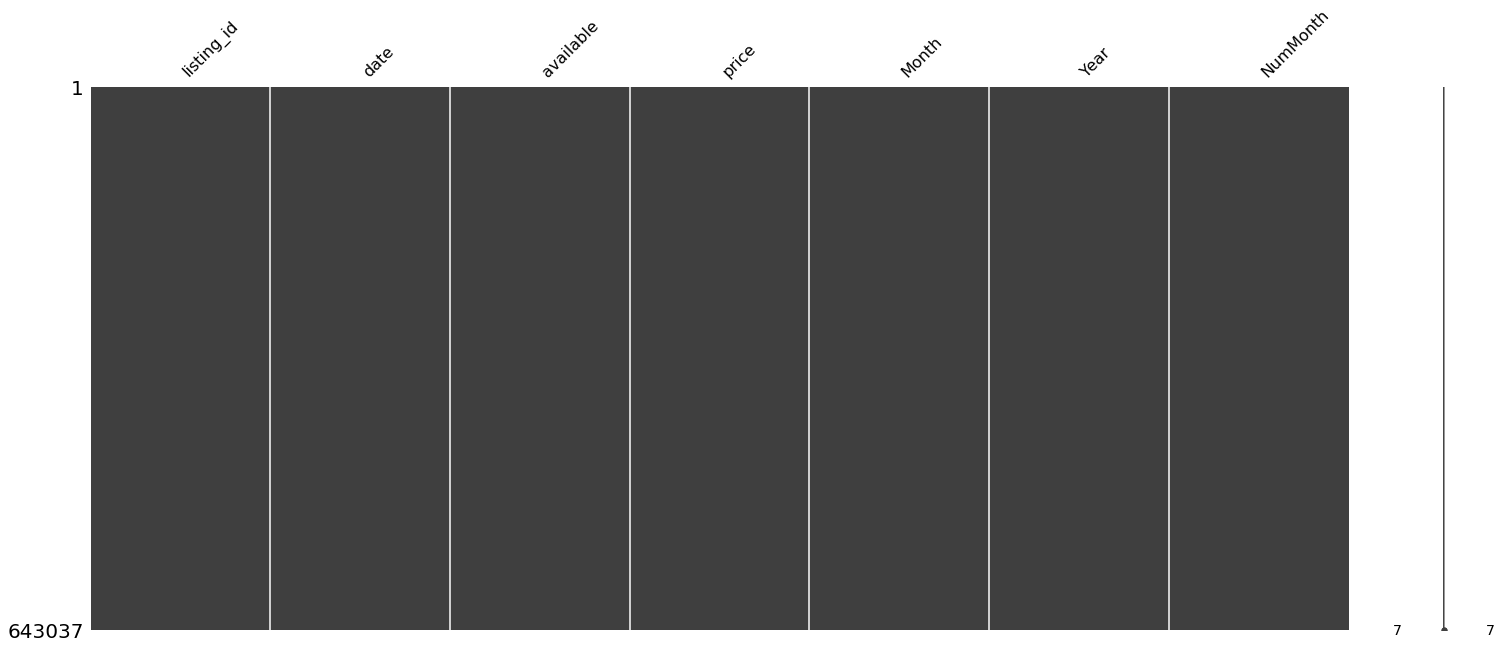

In [44]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

## Data Visualization

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer
# Change datatype:

amenities = listings_df.amenities.map(lambda ele: [amenity_list.replace('"', '').replace('{', '').replace('}', '').replace('/', '') for amenity_list in ele.split(',')])
amenities
mlb = MultiLabelBinarizer()
fit = pd.DataFrame(mlb.fit_transform(amenities), columns=mlb.classes_, index=amenities.index)

In [46]:
# Combine ameamenities to listing data:
listings_df = pd.concat([listings_df, fit], axis = 1, sort = False)
listings_df.sample(5)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
id,,,,,,,,,,,,,,,,,,,,,
13624476,https://www.airbnb.com/rooms/13624476,20160906204935,2016-09-07,Waterfront Northend Condo,Newly renovated condo in managed building with...,0,Newly renovated condo in managed building with...,none,0,0,...,0,0,0,0,0,0,0,0,0,0
7472068,https://www.airbnb.com/rooms/7472068,20160906204935,2016-09-07,Beautiful Bunker Hill 2 BD,Hi! Welcome to my home! You have the entire ap...,0,Hi! Welcome to my home! You have the entire ap...,none,Charlestown is home to two significant histori...,Security deposit is not collected up front. Se...,...,1,0,0,1,1,0,0,1,0,0
11788394,https://www.airbnb.com/rooms/11788394,20160906204935,2016-09-07,Luxury brownstone close to Fenway with river v...,Luxury condo in a gut renovated brownstone ste...,Spacious and relaxing home in the heart of Ken...,Luxury condo in a gut renovated brownstone ste...,none,We are right on the water yet steps away from ...,0,...,1,0,0,1,1,0,0,1,1,1
10426124,https://www.airbnb.com/rooms/10426124,20160906204935,2016-09-07,"Spacious, comfy, Downtown 15 min.",A beautiful Victorian apartment in Dorchester....,The Space This is a spacious apartment has hig...,A beautiful Victorian apartment in Dorchester....,none,0,"The home has permanent, hi-speed cable interne...",...,1,0,0,1,0,0,0,1,0,0
31796,https://www.airbnb.com/rooms/31796,20160906204935,2016-09-07,Big room with two bed/Room A,"I'm working professional woman, originally fro...","Big, beautiful Victorian house on three floors...","I'm working professional woman, originally fro...",none,"Mixed population, safe, convenient location, i...","Very convenient, affordable and save locatio...",...,1,0,0,0,1,0,0,1,0,1


In [47]:
#Calculate the number of amenities owned by the listings
listings_df['availability_rate']=(listings_df.availability_90)/90
listings_df

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,Smoking Allowed,Suitable for Events,TV,Washer,Washer Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,availability_rate
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",0,...,0,0,1,1,0,0,1,0,0,0.000000
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,0,0,1,1,0,0,1,0,0,0.933333
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,0,0,1,1,0,0,1,1,1,0.677778
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,0,0,1,1,0,0,1,0,0,0.288889
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,0,0,0,0,0,0,1,0,0,0.655556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,0,5 min walking to Orange Line subway with 2 sto...,none,0,0,...,0,0,0,0,0,0,1,0,0,0.900000
14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,0,0,...,1,0,1,1,0,0,1,0,0,0.988889
14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...",...,0,0,0,0,0,0,0,1,1,0.444444


In [48]:
listings_df.minimum_nights.info()

<class 'pandas.core.series.Series'>
Int64Index: 3254 entries, 12147973 to 14504422
Series name: minimum_nights
Non-Null Count  Dtype
--------------  -----
3254 non-null   int64
dtypes: int64(1)
memory usage: 50.8 KB


In [49]:

# Create new list from listing_data(only int and float)

num = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 
             'cleaning_fee', 'guests_included','host_response_rate', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'extra_people','availability_rate']
listings_df.dropna(subset=['cleaning_fee'], inplace=True)
listings_df.cleaning_fee = listings_df.cleaning_fee.astype('str')
import re
listings_df.cleaning_fee = listings_df.cleaning_fee.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)
listings_df.dropna(subset=['extra_people'], inplace=True)
listings_df.extra_people = listings_df.extra_people.astype('str')
import re
listings_df.extra_people = listings_df.extra_people.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)
listings_df.dropna(subset=['host_response_rate'], inplace=True)
listings_df.host_response_rate = listings_df.host_response_rate.astype('str')
listings_df.host_response_rate.info()
import re
listings_df.host_response_rate = listings_df.host_response_rate.apply(
    lambda value: re.sub(r'\%|,', '', value)
).astype(float)

<class 'pandas.core.series.Series'>
Int64Index: 3254 entries, 12147973 to 14504422
Series name: host_response_rate
Non-Null Count  Dtype 
--------------  ----- 
3254 non-null   object
dtypes: object(1)
memory usage: 50.8+ KB


In [50]:
listings_df.accommodates.info()
listings_df.minimum_nights.info()

<class 'pandas.core.series.Series'>
Int64Index: 3254 entries, 12147973 to 14504422
Series name: accommodates
Non-Null Count  Dtype
--------------  -----
3254 non-null   int32
dtypes: int32(1)
memory usage: 38.1 KB
<class 'pandas.core.series.Series'>
Int64Index: 3254 entries, 12147973 to 14504422
Series name: minimum_nights
Non-Null Count  Dtype
--------------  -----
3254 non-null   int64
dtypes: int64(1)
memory usage: 50.8 KB


In [51]:
data1 = listings_df.select_dtypes(include=['int32','int64', 'float64'])[num]

In [52]:
# Create new list from listing_data(only Object)

cat = ['neighbourhood', 'require_guest_phone_verification', 'bed_type', 'room_type', 'host_is_superhost', 'cancellation_policy', 'property_type', 'is_location_exact']

In [53]:
data1[cat] = listings_df[cat]

In [54]:
d_data = data1.copy()

In [55]:
new_data = pd.get_dummies(d_data)

In [56]:
new_data = new_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [57]:
y = new_data['price']
X = new_data.drop('price',  axis =1 )

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
import seaborn as sb

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [63]:
# Linear Regression Model:

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.35102208698092496

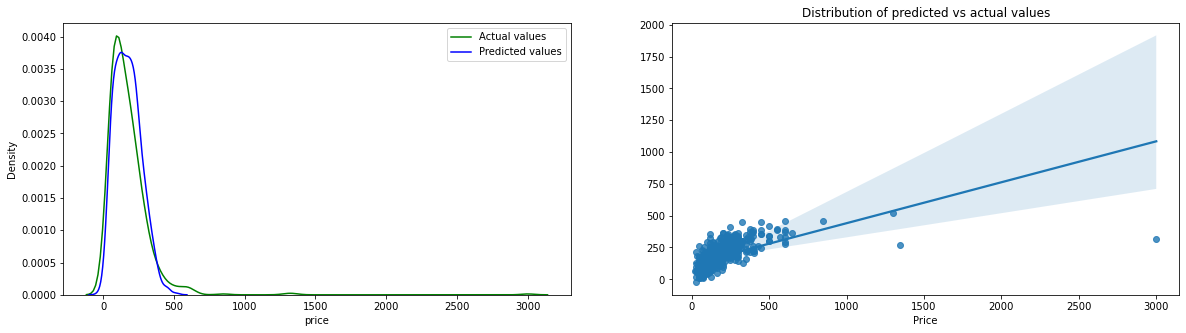

In [64]:
# Plot predicted and original values:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

In [66]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators=80, random_state=42)
ran.fit(X_train, y_train)

y_preds = ran.predict(X_test)
r2_score(y_test, y_preds)

0.39115694948400004

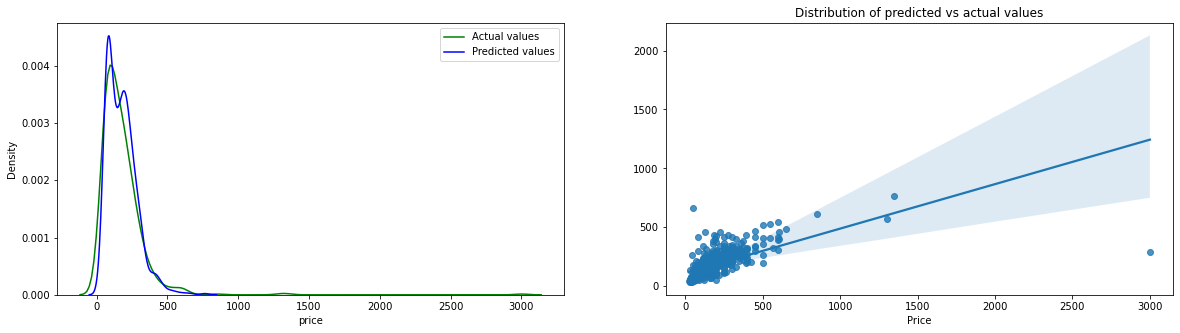

In [67]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [68]:
models = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    GaussianProcessClassifier(),
    PassiveAggressiveClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    SVC(),
    LinearSVC()
]

In [69]:
classifier_Names = ['AdaBoost', 'Bagging', 'ExtraTrees',
                    'GradientBoosting', 'RandomForest', 'GaussianProcess',
                    'PassiveAggressive', 'Ridge', 'SGD',
                    'KNeighbors', 'GaussianNB', 'MLP',
                    'DecisionTree', 'ExtraTree', 'SVC', 'LinearSVC']